# ListNet Learning-to-rank model
> Training ListNet on synthetic data in pytorch

- toc: false
- badges: true
- comments: false
- categories: [LTR]
- image:

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class RankNet(nn.Module):
    def __init__(self, num_feature):
        super(RankNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(num_feature, 512),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        self.output_sig = nn.Sigmoid()

    def forward(self, input_1, input_2):
        # relevant document score
        s1 = self.model(input_1)
        # irrelevant document score
        s2 = self.model(input_2)
        # subtract scores
        out = self.output_sig(s1-s2)
        return out
    
    def predict(self, input_):
        s = self.model(input_)
        return s

In [10]:
# generating synthetic data

n_sample = 30000
n_feature = 300

data1 = torch.rand((n_sample, n_feature))
data2 = torch.rand((n_sample, n_feature))

y = np.random.random((n_sample, 1))
y = y > 0.9
y = 1. * y
y = torch.Tensor(y)

In [11]:
rank_model = RankNet(num_feature = n_feature)
optimizer = torch.optim.Adam(rank_model.parameters())
loss_fun = torch.nn.BCELoss()

In [12]:
# putting to GPU for faster learning
rank_model.cuda()
loss_fun.cuda()
data1 = data1.cuda()
data2 = data2.cuda()
y = y.cuda()

In [13]:
epoch = 5000

losses = []

for i in range(epoch):
    
    rank_model.zero_grad()
    
    y_pred = rank_model(data1, data2)
    
    loss = loss_fun(y_pred,y)
    
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

    if i % 200 == 0:
        print('Epoch{}, loss : {}'.format(i, loss.item()))

Epoch0, loss : 0.6934983134269714
Epoch200, loss : 0.6234923005104065
Epoch400, loss : 0.5908725261688232
Epoch600, loss : 0.5725120306015015
Epoch800, loss : 0.5650842785835266
Epoch1000, loss : 0.5539830923080444
Epoch1200, loss : 0.5425616502761841
Epoch1400, loss : 0.5443077683448792
Epoch1600, loss : 0.5290021896362305
Epoch1800, loss : 0.5167105793952942
Epoch2000, loss : 0.5156576633453369
Epoch2200, loss : 0.5250223875045776
Epoch2400, loss : 0.5087729692459106
Epoch2600, loss : 0.501204252243042
Epoch2800, loss : 0.4987131655216217
Epoch3000, loss : 0.49593260884284973
Epoch3200, loss : 0.4908640384674072
Epoch3400, loss : 0.4914567768573761
Epoch3600, loss : 0.4882286489009857
Epoch3800, loss : 0.48537924885749817
Epoch4000, loss : 0.4817756116390228
Epoch4200, loss : 0.4788053035736084
Epoch4400, loss : 0.4834482669830322
Epoch4600, loss : 0.48357853293418884
Epoch4800, loss : 0.4835440516471863


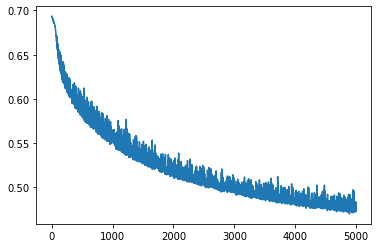

In [16]:
x = list(range(5000))
plt.plot(x, losses)